In [14]:
import pandas as pd
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [15]:
import yfinance as yf

In [16]:
df = pd.read_csv('tickers.csv')
df

,NASDAQ
0,AACG
1,AACQ
2,AACQU
3,AACQW


In [17]:
def plot_chart(df):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,df.values,width=0.6, 
                   colorup='green', colordown='red', alpha=1)
    fig.tight_layout()
    fig.show()

In [18]:
def get_stock_data(symbol):
    ticker = yfinance.Ticker(symbol)
    df = ticker.history(interval="1d",start="2023-01-01")
    df['Date'] = range(df.shape[0])
    df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
    return df



def get_heikinashi_data(stock_data):
    df_ha = stock_data.copy()
    for i in range(df_ha.shape[0]):
        if i == 0:
            df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i] + df['Close'][i])/2

        else: 
            df_ha.loc[df_ha.index[i],'Open'] = (df_ha['Open'][i-1] + df_ha['Close'][i-1])/2

        df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
        df_ha.loc[df_ha.index[i],'High'] = max([df['High'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
        df_ha.loc[df_ha.index[i],'Low'] = min([df['Low'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
        
    return df_ha

In [19]:
# for sym in df['NASDAQ']:
    # print(sym)
df = get_stock_data('INFY.NS')


C:\Users\Mayur\AppData\Local\Temp\ipykernel_21136\3270876252.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


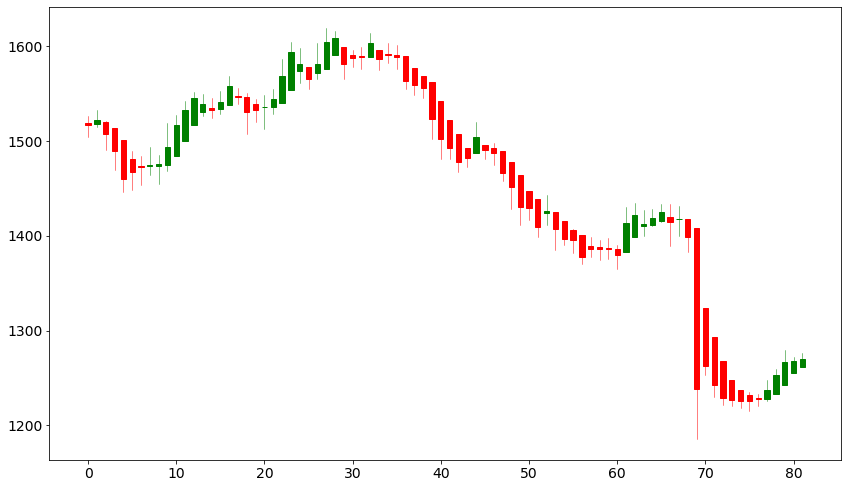

In [20]:
ha_df = get_heikinashi_data(df)
plot_chart(ha_df)

In [ ]:
# name = 'INFY.NS'
# ticker = yfinance.Ticker(name)
# df = ticker.history(interval="5d",start="2023-01-01")
# df['Date'] = range(df.shape[0])
# df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]



# df_ha = df.copy()


# for i in range(df_ha.shape[0]):
#     if i == 0:
#         df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i] + df['Close'][i])/2
        
#     else: 
#         df_ha.loc[df_ha.index[i],'Open'] = (df_ha['Open'][i-1] + df_ha['Close'][i-1])/2
  
#     df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
#     df_ha.loc[df_ha.index[i],'High'] = max([df['High'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
#     df_ha.loc[df_ha.index[i],'Low'] = min([df['Low'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
    
# df_ha = df_ha.iloc[1:,:]

In [22]:
ha_df[-3:]

,Date,Open,High,Low,Close
Date,,,,,
2023-05-02 00:00:00+05:30,79,1242.859306,1279.750000,1242.859306,1266.575012
2023-05-03 00:00:00+05:30,80,1254.717159,1272.500000,1254.717159,1267.437500
2023-05-04 00:00:00+05:30,81,1261.077330,1275.800049,1261.077330,1270.200012
